# Modélisation d'un vol d'une fusée

## 1. Introduction


Nous allons étudier la trajectoire de vol d'une fusée dans l'air. En utilisant le langage Python nous allons la calculer numériquement. L'équation de la fusé est decrite comme suit :


\begin{align}
\frac{dh}{dt}& = v \\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}


$m_s = 50kg$ est la masse de fusée hors carburant

$g = 9.81 \frac{m}{s^2}$ est l'accélération du à la gravité supposée constante

$\rho = 1.091 \frac{kg}{m^3}$ est la densité de l'air supposée constante

$A = \pi r^2$ est l'air de la section transverse de la fusée et vaut $r = 0.5 m$

$v_e = 325 \frac{m}{s}$ est la vitesse d'éjection du gaz à la sortie de la tuyère

$C_D = 0.15 $ est le coefficient de trainer



On suposera aussi que la masse du carburant enbarqué évolue selon la loi 
$$mp = mp - \int^t_0 20 d\tau$$ où 20 est la consomation de kilo de carburant par seconde.


## 2.Résolution


Comme la résolution analytique est peu commode nous resolverons le problème précédent de manière numérique. 

Pour résoudre numériquement ce problème, nous utiliserons la méthode d'Euler progressive. La descrétisation est comme suit :


$$ h_{n+1} = h_n + f(h_n) \Delta t $$
$$ v_{n+1} = v_n + g(v_n) \Delta t $$
Ce qui donnera au final :
$$ v_{n+1} = \-g + frac { 20 ve - 0.5 \rho |v_n|v_n A Cd }{ms+mp} \Delta t + v_n $$
$$ h_{n+1} = v_n \Delta t + h_n $$


Nous importons quelques libraires pour effectués cette résolution. La première est numpy est une libraire avec des fonctionnalités orientées calculs. De cette librairie nous allons utiliser les numpy arrays. Ces types de données ont l'avantage par rapport aux listes directement implémentées dans python d'avoir des fonctionnalités sumplémentaires.
Ensuite nous utiliserons matplotlib pour afficher les graphiques

In [31]:
"""
importation des librairies
"""

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
"""
initialisation des variables
"""
step = 0.1
ms = 50
g = 9.81
p = 1.091
r = 0.5
A = numpy.pi*(r**2)
ve = 325
Cd = 0.15
mp =  100
hn = 0
vi = 0
i = 0

first_estimate = 40 #estimation du temps 
len_descrit_vec = int(first_estimate/step)+1 # donne la tailme des vecteurs

t = numpy.linspace(0,first_estimate,int(len_descrit_vec)) 
v = numpy.zeros(len_descrit_vec)
h = numpy.zeros(len_descrit_vec)
m = numpy.zeros(len_descrit_vec)

On definit dans le cadre précédent les variables nécessaires au bon fonctionnement de la boucle ainsi que les variables globales introduite dans l'équation décrivant le système. les vecteurs t,v,h,m sont repectivement les vecteurs qui receveront les valeurs calculers pendant l'execution de la boucle. La taille de ces vecteurs est calculé sur le nombre d'itération necessaire pour calculer toute la simulation. Ce nombre d'itération est la taille de l'intervalle de la simulation  divisée par la taille du step (pas d'intégration). La taille de l'intervalle a été estimé en post traitement. En effet il est relativement compliqué de traité un vecteur de taille non-prédéfinie avec une numpy array. 



In [33]:
thmax =0 
tvmx =0
hmax =0
hvmx = 0
vmx =0
tsol =0
vsol = 0

for i in range(1,int(len_descrit_vec)):
    if hn<0:
        break
    hn = vi * step + hn
    if t[i] > 5: # cette boucle if est la pour tenir compte de la masse variable en effet apres 5 seconde 
                 #il n'y a plus de carburant
        mp = 0;
        vi = (-g+(-0.5*vi*p*abs(vi)*A*Cd)/(ms+mp))*step + vi
    else :
        vi = ((-1)*g+20*ve/(ms+mp)-(0.5*vi*p*abs(vi)*A*Cd)/(ms+mp))*step + vi
        mp = mp - 20*step

    
    if hn>hmax:
        hmax = hn
        tHmax = t[i]
    if vi > vmx:
        vmx = vi
        tvmx = t[i]
        hvmx = hn
    if hn<0:
        tsol = t[i]
        vsol = vi

    v[i] = vi
    h[i] = hn
    m[i] = mp
    
"""
Impression des resultats
"""



print("vitesse est maximale en "+str(tvmx)+" s et vaut "+str(vmx)+ " m/s où la hauteur vaut " + str(hvmx), "m.")
print("la hauteur est maximale en t = "+ str(tHmax) +" et vaut h = "+str(hmax))
print("la fusee touche le sol en t = " + str((tsol)))
print("avec la vitesse " +str(vsol))

vitesse est maximale en 5.0 s et vaut 232.1061334126179 m/s où la hauteur vaut 523.5228342918476 m.
la hauteur est maximale en t = 15.7 et vaut h = 1334.1829454303067
la fusee touche le sol en t = 37.1
avec la vitesse -86.00683498380592


Le code se déroule de la manière suivante. On va calculer la valeur suivante de la table en se basant sur la précédente en utilisant la méthode d'Euleur. Les variables definies avant la boucle sont là pour stocker la valeur des différentes information que l'on cherche tel que la hauteur maximale ainsi de suite.

Les valeurs initiales sont données par le condition initiale de notre équation différentielles. Ainsi h(0) = 0 et v(0) = 0. 

A propos de la boucle, elle se décompose en 3 étages de conditions (if). Le premier _if_ est là pour vérifier que le sol est atteint ou pas. En effet si la hauteur devient négative cela signifie bien que l'on a touché le sol. 
Le deuxième étage de condition est là pour vérifier l'état du carburant. La vitesse cessera de croitre si il n'y a plus de carburant en toute logique. 
Enfin la dernière série de codition est là pour trouver le maximum des différentes données. Il exite une autre méthode utilisant la fonction numpy.argmax mais cela reviendrait à la même chose. 



## 3.Graphiques et interprétation des résultats

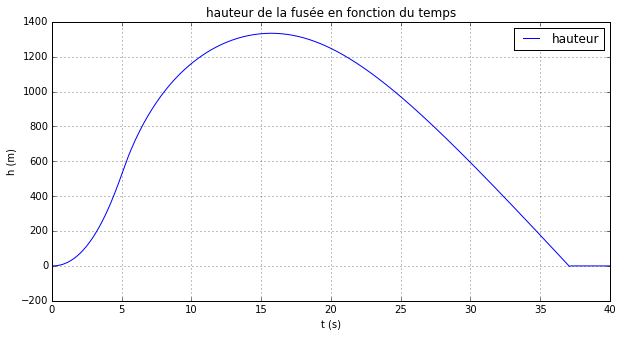

In [34]:
"""
Impression du graphique hauteur
"""

plt.figure(figsize=(10,5))
plt.plot(t,h,label="hauteur")
plt.grid(True)
plt.title("hauteur de la fusée en fonction du temps")
plt.xlabel('t (s)')
plt.ylabel('h (m)')
plt.legend()
plt.show() 

Analysons le graphique de la hauteur. On observe bien la première phase du vol où la fusée accélère. Cela se traduit graphiquement par une concavité négative. Physiquement, nous avant la même intuition vu que on continue à éjecter du carburant durant cette partie. Après 5 sec, nous changeons de concavité pour atteindre un maximum. Puis la fusée vas descendre en accélerant du à la gravité. Enfin en t = 37.1 s la fusée touche le sol ce qui explique pourquoi la hauteur est nul après ce temps-là.

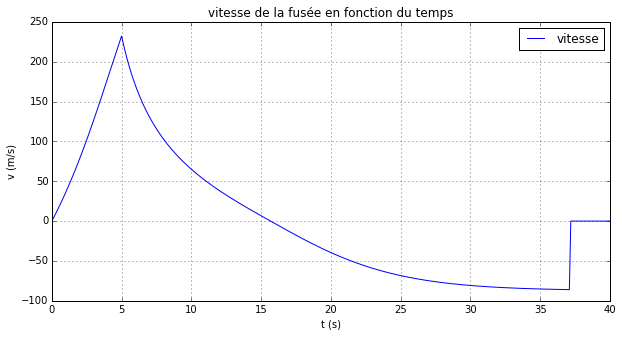

In [35]:
"""
Impression du graphique vitesse
"""
plt.figure(figsize=(10,5))
plt.plot(t,v, label= "vitesse")
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.title("vitesse de la fusée en fonction du temps")
plt.grid(True)
plt.legend()
plt.show()

Regardons à présent le graphique de la vitesse en fonction du temps. On observe bien que le maximum de la vitesse et le point d'inflexion de la hauteur coïncide. Ce qui est un bon point car nous retrouvons bien le vient entre la vitesse et la hauteur la première étant la dérivée de la seconde. Un deuxième point intéressant est d'observé que la vitesse ne tends pas vers $ - \infty$. Nous avons modélisés des forces de frotements dans nos calculs. Cette diminution de la pente de la vitesse est s'interprète comme un equilibre entre la gravité et les frottements qui ont tendance à s'opposer à cette dernière. Un petit bémol quant à la justesse physique de la simaltion est que la vitesse passe brusquement de -86 m/s à 0. Ceci est normal car nous coupons brusquement la simulation lorsque la fusée touche le sol. 


Un autre point de l'analyse imporant est de vérifier si notre solution a bien convergé. Regardons le tableau ci-dessous:


| step | hmax (m)| vmax(m/s) |
|-|-|-|
|0,1|1334,2|232.1|
|0,01|1348,8|232.4|
|0,001|1350,2|232.4|
|0,0001|1350,4|232.4||


On voit que que l'on a une solution qui a convergé avec un pas de 0.001 . Mais comme on voit que malgré l'utilsation d'un pas de temps assez grossié on a une erreur inférieur au pourcent ce qui est acceptable pour une simulation numérique. Ces différences sont dues à la propagation des érreurs d'apprximation à chaque itération.  

## 5. Conclusion


Nous avons vérifié nos resultats avec ceux du site et ils sont bons.

Au travers de cette exercice, nous avons appris à utiliser de méthodes numériques pour résoudre des équations différentielles difficiles à résoudre analytiquement ainsi que des outils de visualisations graphiques. 
